In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.io as pio
import plotly
from IPython.display import Image
import sys
#import phik
pio.renderers.default = 'svg'
#pio.orca.config.use_xvfb = True
#plotly.io.orca.config.executable = '/usr/local/bin/to/'
#plotly.io.orca.config.executable = '/Users/fast6/anaconda3/orca_ap'


In [2]:
from warnings import simplefilter
simplefilter("ignore", FutureWarning)
%matplotlib inline

In [3]:
sales=pd.read_csv('y_df.csv')
sales['date']= pd.to_datetime(sales['date'])
sales.head()

,date,total_sales
0,2011-01-29,32631.0
1,2011-01-30,31749.0
2,2011-01-31,23783.0
3,2011-02-01,25412.0
4,2011-02-02,19146.0


In [4]:
# sales=sales.merge(calendar,
#             left_on='date',
#             right_on='date',
#            #left_index=True,
#            #right_index=True,
#             validate='1:1') \
#     .set_index('date')
# sales.head()

In [5]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1941 entries, 0 to 1940
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1941 non-null   datetime64[ns]
 1   total_sales  1941 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 30.5 KB


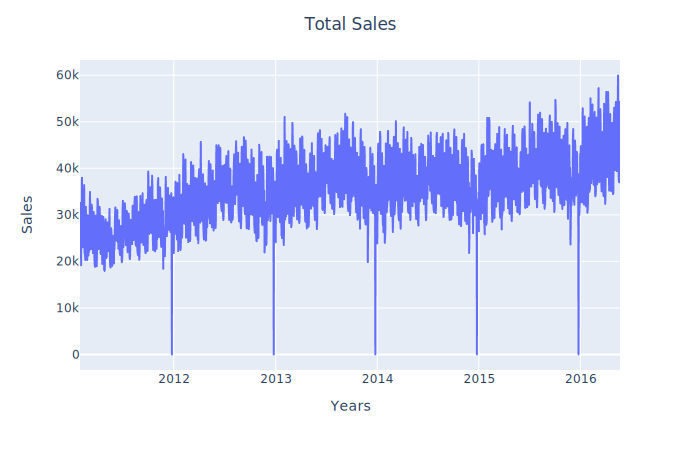

In [8]:
# https://plotly.com/python/time-series/
# https://stackoverflow.com/a/27277074

# Since the Sales CSV has data only for about 1941 days, we are picking the date for 1941 days from Cal CSV.
date = sales['date']

# Before plotting the chart for total sales every day across all the states, we are creating a Data Frame making it convinent to plot
temp = pd.DataFrame({'Years':date, "Sales":sales.total_sales})

# Using plotly line plot to make it interactive
fig = px.line(data_frame=temp, x="Years", y="Sales")

# The tilte parameter sets the title for the chart and title_x = 0.5 brings it to center, the value ranges between 0 - 1.
fig.update_layout(title='Total Sales', title_x=0.5)
fig.show()
#fig.show("svg")

Observation:

There are 1941 days columns/features, which is around 5 years of data

Every Year on Christmas the sales greatly fall less than 50.

The demand is growing every year, not exponentially but smoothly.

In [9]:
cal=pd.read_csv('calendar.csv')
cal['date']= pd.to_datetime(cal['date'])
cal.head()

,date,wm_yr_wk,weekday,wday,month,year,d,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI
0,2011-01-29,11101,Saturday,1,1,2011,d_1,NaN,NaN,NaN,NaN,0,0,0
1,2011-01-30,11101,Sunday,2,1,2011,d_2,NaN,NaN,NaN,NaN,0,0,0
2,2011-01-31,11101,Monday,3,1,2011,d_3,NaN,NaN,NaN,NaN,0,0,0
3,2011-02-01,11101,Tuesday,4,2,2011,d_4,NaN,NaN,NaN,NaN,1,1,0
4,2011-02-02,11101,Wednesday,5,2,2011,d_5,NaN,NaN,NaN,NaN,1,0,1


In [10]:
cal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1969 entries, 0 to 1968
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          1969 non-null   datetime64[ns]
 1   wm_yr_wk      1969 non-null   int64         
 2   weekday       1969 non-null   object        
 3   wday          1969 non-null   int64         
 4   month         1969 non-null   int64         
 5   year          1969 non-null   int64         
 6   d             1969 non-null   object        
 7   event_name_1  162 non-null    object        
 8   event_type_1  162 non-null    object        
 9   event_name_2  5 non-null      object        
 10  event_type_2  5 non-null      object        
 11  snap_CA       1969 non-null   int64         
 12  snap_TX       1969 non-null   int64         
 13  snap_WI       1969 non-null   int64         
dtypes: datetime64[ns](1), int64(7), object(6)
memory usage: 215.5+ KB


In [11]:
print(f"There are totally {cal.event_type_1.nunique()} {tuple(cal.event_type_1.unique()[1:])} types of events happening through out the year")
print(f"There are {cal.isna().sum().sum()} missing/NaN values in cal dataframe")

There are totally 4 ('Sporting', 'Cultural', 'National', 'Religious') types of events happening through out the year
There are 7542 missing/NaN values in cal dataframe


Observation:

On the span of 5 years between 2011-01-29 and 2016-06-19, there were special events on 162 days out of which 5 days had multiple events.

In [12]:
# Filling the places of NaN values with No_Event
cal.fillna('No_Event', inplace=True)

# we are picking the features weekday and d from the cal csv till 1941 rows.
d = cal[['date','weekday']]

In [13]:
#We are merging the dataframe c and d and setting the index to be d and grouping it by weekdays and summing it which gives the sale of every product each, 
#we are again summing it up, this gives the sale of total products on a weekday and then sorting by it's increasing order.
temp = sales.merge(d,left_on='date', right_on='date')
temp.set_index('date', inplace=True)
temp = temp.groupby('weekday').sum().sort_values(by='total_sales')


In [14]:
temp.sum()

total_sales    66927173.0
dtype: float64

In [15]:
y=[(np.round(np.take(i,indices=0)/66927173*100,2)) for i in temp.values]

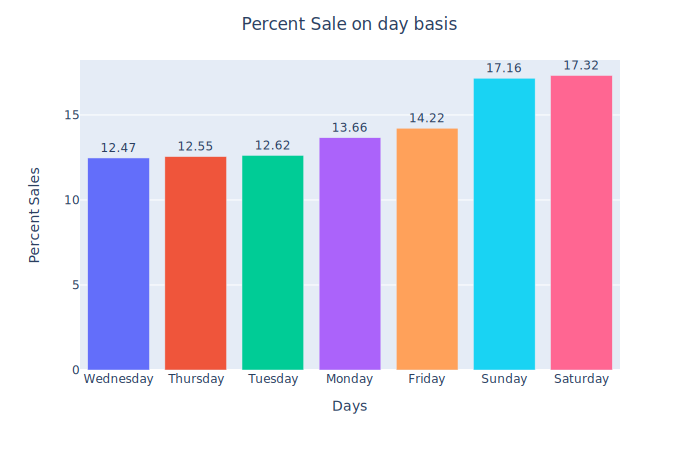

In [16]:

"""We are defining a variable colors for different colours, then plotting a bar graph"""

colors = ['a','b','c','d','e','f','g']
fig = px.bar(x=temp.index, y=y, labels={'x':"Days","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent Sale on day basis", title_x=0.5,width=800, height=500)
fig.show()

Observation:

There's a huge number of sales happening during the weekends.
The sales rise and fall before and after weekends from Friday to Monday.

In [17]:
# We are generating month names based on the date provided
cal['Month'] = pd.to_datetime(cal['date']).dt.strftime('%B')

# we are picking the features Month,d and year from the cal csv till 1941 rows.
d = cal[['Month','date','year']]

# We are then merging both c and d for our analysis
temp = sales.merge(d,left_on='date', right_on='date')


# Now before summing up the sales on every month we are grouping those with their year and month and then summing it up.
temp = temp.groupby(['year','Month']).sum().unstack()

# As we have multiple levels of columns, we are dropping column names at level 1
temp.columns = temp.columns.droplevel(level=0)

# We are then generating date between 2 periods on Yearly start dates.
a = pd.date_range(start='2011-01', end="2016-06", freq = 'YS')

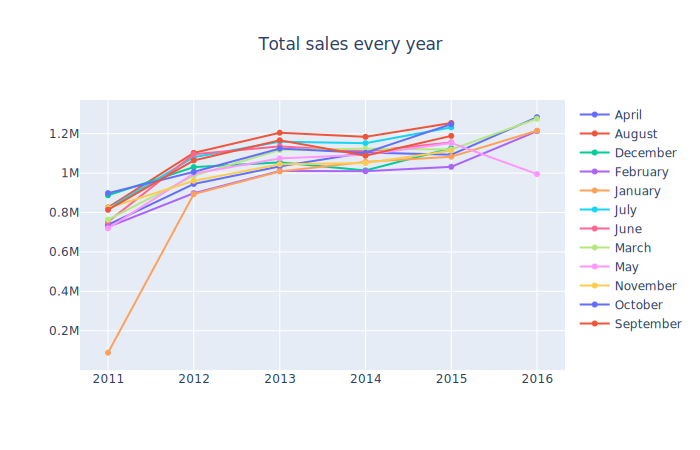

In [18]:
fig = go.Figure()

# Then for every feature in the dataframe, we are creating a line plot and then appending it to the variable fig
for i in temp.columns:
    fig.add_trace(go.Scatter(x = a, y = temp[i], name=str(i).title()))

fig.update_layout(height=600, hovermode="x", title='Total sales every year', title_x=0.5)

fig.show()


Observation:

Since 2012, August rates the highest sales about 1.2M products
July either ranks 2nd or 3rd on total sales.
At 2016, the sales numbers have increased almost 20%.

In [19]:
#We are picking the features event_type_1 and d from the cal csv then merging it with c and setting the index to be d and grouping it by event_type_1 
#and taking a mean of it which gives the avg. sale of every product, we are again taking mean, this gives the avg. sale of total products on a weekday 
#and then sorting by it's increasing order. We are taking average here because the days with no events are very high than days with events, hence summing 
#those values will be improper.

# we are picking the features weekday and date from the cal csv till 1941 rows.
d = cal[['date','event_type_1']]

# we are picking the features weekday and d from the cal csv till 1941 rows.

temp = sales.merge(d,left_on='date', right_on='date')
temp.set_index('date', inplace=True)
temp = temp.groupby('event_type_1').mean().sort_values(by='total_sales')
temp.sum()

total_sales    169008.744151
dtype: float64

In [20]:
y = [(np.round(np.take(i,indices=0)/134399.4*100, 2)) for i in temp.values]

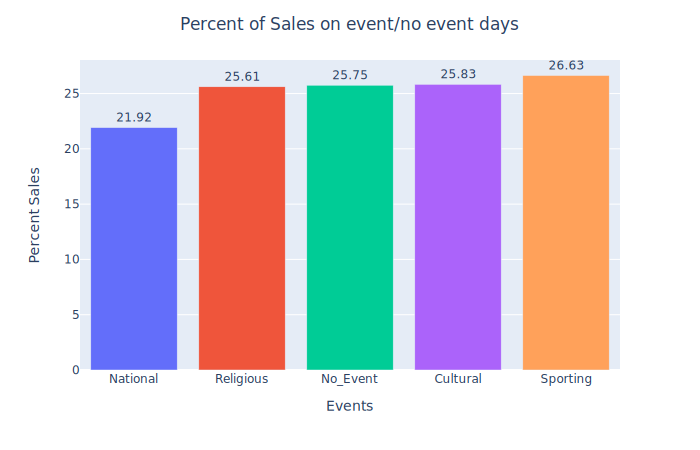

In [21]:

colors = ['a','b','c','d','e']
fig = px.bar(x=temp.index, y=y, labels={'x':"Events","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent of Sales on event/no event days", title_x=0.5, width=800, height=500)
fig.show()


Observation:

The sales happened during sporting event times are slightly more than sales happened around no events and other events.
The sales happened on National event days are little lower.

In [22]:
"""We are creating a new feature No. of events in cal csv, by counting how many time 'No_Event' comes in a row.
If there are 4 No_Events in a row it means there were no events on that day, if there was 2 "No Events" on a row then it means there was 1 event on that day
and if there 0 "No_Events" on a row, then it means there were 2 events on that day."""

g = []
for i in np.sum(cal == 'No_Event', axis=1):
    if i == 0:
        g.append('Two')
    elif i == 2:
        g.append('One')
    else:
        g.append('Zero')

cal['No_of_events'] = g

In [23]:

#Now we are grouping them, calculating the mean and then plotting themtemp.sum()

d = cal[['No_of_events','date']]
temp = sales.merge(d,left_on='date', right_on='date')
temp.set_index('date', inplace=True)

temp = temp.groupby('No_of_events').mean().sort_values(by='total_sales')
temp.sum()

total_sales    104694.164434
dtype: float64

In [24]:

y = [(np.round(np.take(i,indices=0)/104694.2*100, 2)) for i in temp.values]


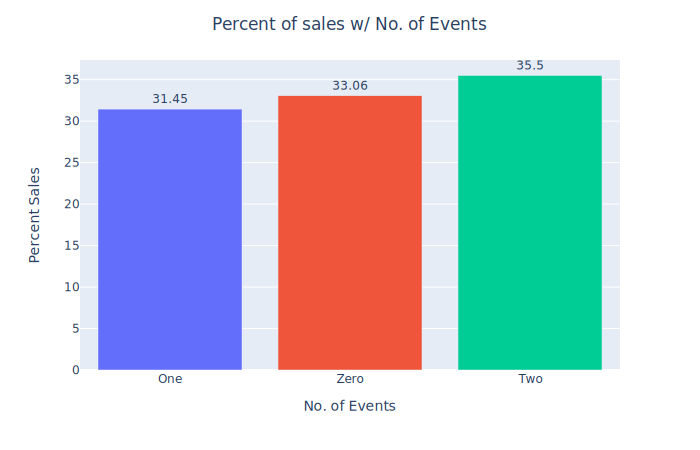

In [25]:
colors = ['a','b','c']
fig = px.bar(x=temp.index, y=y, labels={'x':"No. of Events","y":'Percent Sales'},color=colors, text=y)
fig.update_traces(hovertemplate='Total Sales: %{y}', textposition='outside')
fig.update_layout(showlegend=False, title="Percent of sales w/ No. of Events", title_x=0.5, width=800, height=500)
fig.show()


Observation:

When there were 2 events on a day the sales happened are little high than days when there were no events.
But on the contrary, when there were 1 event, the sales happened were little less than days when there were no events.

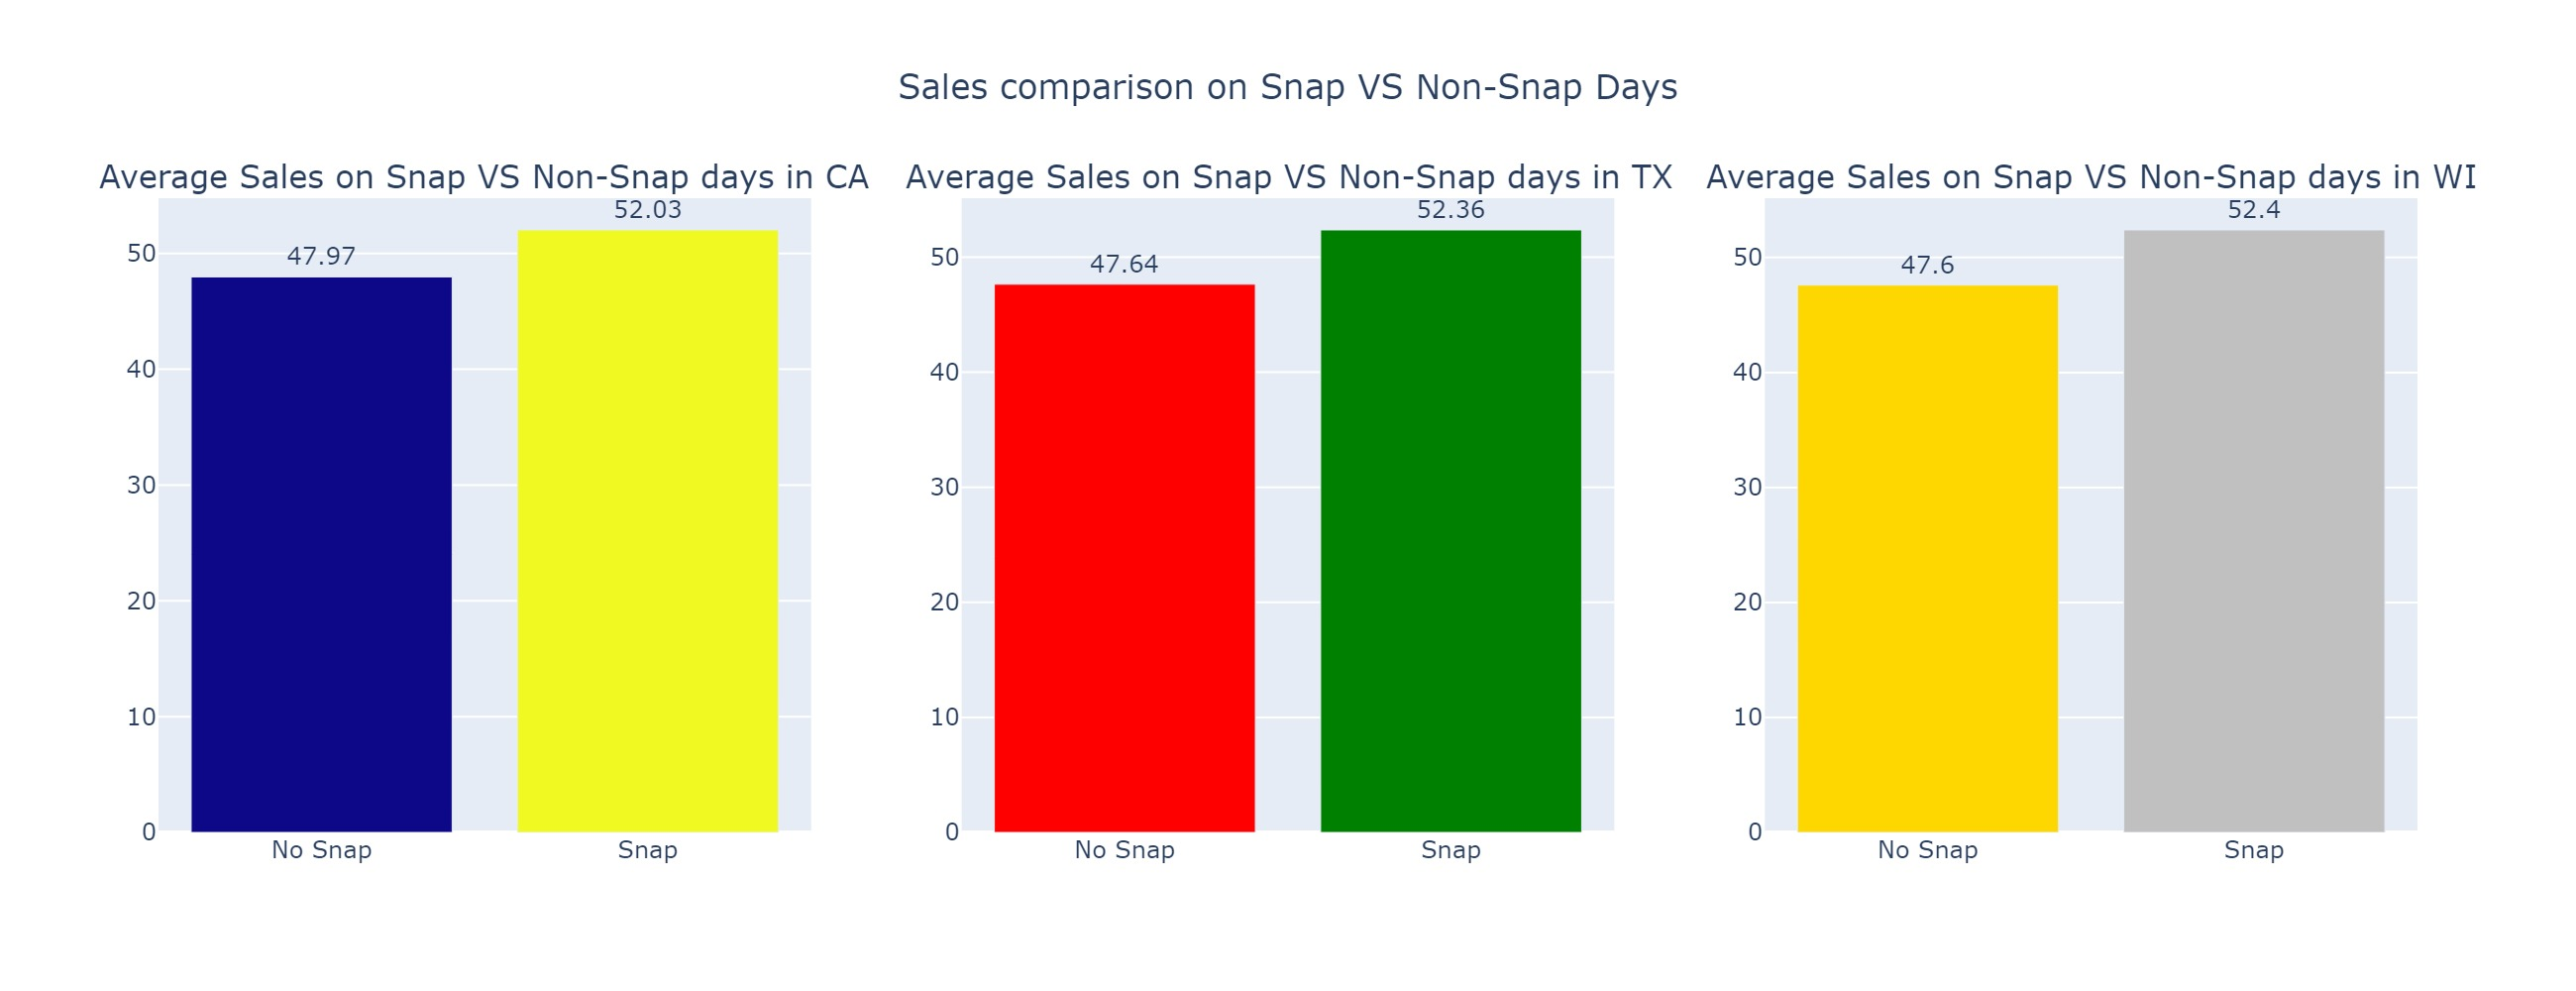

In [26]:
# https://stackoverflow.com/a/28238656

# We are picking only the snap features from the cal csv and d for merging with sales csv
d = cal[['snap_CA','snap_TX','snap_WI','date']]

temp = sales.merge(d,left_on='date', right_on='date')
temp.set_index('date', inplace=True)
#temp = sales[['snap_CA','snap_TX','snap_WI','total_sales']]
#temp.set_index('d', inplace=True)

# We are then replacing 0s and 1s with No snap and Snap on all the 3 snap columns.
temp['snap_CA'] = temp['snap_CA'].apply(lambda x: "No Snap" if x==0 else "Snap")
temp['snap_TX'] = temp['snap_TX'].apply(lambda x: "No Snap" if x==0 else "Snap")
temp['snap_WI'] = temp['snap_WI'].apply(lambda x: "No Snap" if x==0 else "Snap")

# We are then creating a subplot with 1 row and 3 columns, and giving a title for each subplot.
fig = make_subplots(rows=1, cols=3, subplot_titles=('Average Sales on Snap VS Non-Snap days in CA', \
                                                    'Average Sales on Snap VS Non-Snap days in TX', \
                                                    'Average Sales on Snap VS Non-Snap days in WI'))

"""We are then grouping with snap feature for every state and taking it's mean to give avg. sale of every product for snap and no snap days, 
hence taking mean again to get the avg. sales on total during the snap and non-snap days. Then from the mean value we are computing it's percent of sales.
Then we are creating a bar plot and adding it to the fig for all the states."""

temp1 = temp.groupby('snap_CA').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

# We are passing name parameter with empty string to remove hover which says the trance number.
fig.add_trace(go.Bar(x=temp1.index, y=y, text=y, name = "", marker=dict(color=[1,2])))

temp1 = temp.groupby('snap_TX').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

fig.add_trace(go.Bar(x=temp1.index, y=y, text=y,name = "", marker=dict(color=['red', 'green'])), 1,2)

temp1 = temp.groupby('snap_WI').mean().mean(axis=1).sort_values()
y = [np.round(i/temp1.sum()*100, 2) for i in temp1.values]

fig.add_trace(go.Bar(x=temp1.index, y=y, text=y, name = "", marker=dict(color=['gold','silver'])),1,3)

fig.update_traces(hovertemplate='Total Sales: %{y}',textposition='outside')
fig.update_layout(showlegend=False, title_text="Sales comparison on Snap VS Non-Snap Days", title_x=0.5, width =1300)
if pio.renderers.default == 'colab' or pio.renderers.default == 'notebook_connected':
    fig.show()
else:
    img_bytes = fig.to_image(format="jpeg", width=1300, height=500, scale=2)
    img = Image(img_bytes)
    display(img)


Observation:

Clearly the sales on all the states during the Snap days are high than Non-Snap days, but the difference is not bit.
All the states have almost same amount of sales when on Snap or Non-Snap days.